# Assignment dataset: unsupervised_data.csv

### I start by mounting google drive for files and importing modules.

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!pip install gdown
import gdown
#this way, anyone can access the files without mounting google driving. Accessing the csv files:
csvFileID = '1ENkJnzS6GbtpXV-iYhRHs4bJ27N9jg9H'
url = f'https://drive.google.com/uc?id={csvFileID}'
csvOutputFile = 'unsupervised_data.csv'
gdown.download(url, csvOutputFile, quiet=False)

#accessing the module files:
moduleFileID = '1aAtc0mDjsAMlj_smiQm5KPnaeXmlqJMg'
url = f'https://drive.google.com/uc?id={moduleFileID}'
moduleOutputFile = 'KMeans.py'
gdown.download(url, moduleOutputFile, quiet=False)
from KMeans import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Then reading the data file

In [ ]:
# path = '/content/drive/MyDrive/ML WOC/Data Sets/unsupervised/unsupervised_data.csv'
# data = pd.read_csv(path)
data = pd.read_csv(output_file)

In [ ]:
data.head()
feature_cols = [f"Feature_{i}" for i in range(1,7)]
X = data[feature_cols].to_numpy()
print(X.shape)

(40000, 6)


Standardizing by Z-score:

In [ ]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std

Commented out code for the KMeans class. I have imported this as a module from an external file:

In [ ]:
# class KMeans:
#     def __init__(self):
#         pass
#     def _init_centroids(self, X_train, k):
#         """
#         args:
#         X_train --> 2d array of size (m,n) where m is no. of eg and n is no. of features
#         k --> The k of the K means
#         returns:
#         centroids --> a 2d array of size (k,n) which contains random k random eg from X_train
#         """
#         random_indxs = np.random.choice(X_train.shape[0], size = k, replace = False)
#         centroids = X_train[random_indxs]
#         return centroids
#     def _euc_dist(self,x1,x2):
#         return np.sqrt(np.sum((x1-x2)**2, axis=1))

#     def _assign_clusters(self, X, centroids):
#         clusters = [[] for i in range(centroids.shape[0])]
#         for pt in X:
#             distances = [self._euc_dist(pt, centroids)]
#             nearest_xbar_indx = np.argmin(distances)
#             clusters[nearest_xbar_indx].append(pt)
#         return clusters

#     def _update_centoids(self, clusters, k):
#         new_centroids = np.zeros((k, clusters[0][0].shape[0]))
#         for i in range(k):
#             new_centroids[i] = np.mean(clusters[i], axis = 0)
#         return new_centroids
#     def classify(self,X,k, max_iters = 100):
#         centroids = self._init_centroids(X, k)
#         for i in range(max_iters):
#             clusters = self._assign_clusters(X, centroids)
#             new_centroids = self._update_centoids(clusters, k)
#             if np.all(centroids ==  new_centroids):
#                 break
#             centroids = new_centroids #else case

#         return centroids, clusters

#     def compute_inertia(self, X, centroids, clusters):
#         inertia = 0
#         for i, cluster in enumerate(clusters):
#             arr_pts = np.array(cluster)
#             inertia += np.sum(self._euc_dist(arr_pts, centroids[i]) ** 2)

#         return inertia
#     def get_elbow(self, X, list_of_ks, max_iters=100):
#         inertias = []
#         for indx, k in enumerate(list_of_ks):
#             print(f"Working on k value {k}....")
#             centroids, clusters = self.classify(X, k, max_iters=max_iters)
#             inertia = self.compute_inertia(X, centroids, clusters)
#             inertias.append(inertia)

#         plt.plot(list_of_ks, inertias, linestyle='--',color='green', marker='o',label='Inertias')
#         plt.xticks(list_of_ks)
#         plt.xlabel('K values')
#         plt.ylabel('Inertias')
#         plt.title('Inertia values for different K values')
#         plt.legend()
#         plt.show()

#     def visualize(self, X,k,max_iters=100,feature1=1,feature2=2):
#         centroids, clusters = self.classify(X, k, max_iters=max_iters)
#         colors = ['red', 'blue', 'green', 'black', 'yellow', 'orange', 'brown', 'purple', 'pink', 'gray']
#         for i, cluster in enumerate(clusters):
#             cluster_pts = np.array(cluster)
#             plt.scatter(cluster_pts[:, feature1],cluster_pts[:, feature2], label=f"Cluster {i + 1}", c=colors[i], alpha=0.6)

#         for i in range(centroids.shape[0]):
#           plt.plot(centroids[i, feature1], centroids[i, feature2], marker='x', markersize=15,color=colors[i], markeredgewidth=3, zorder=2)
#           plt.plot(centroids[i, feature1], centroids[i, feature2], marker='x',markersize=10, color='white', zorder=3)
#         # plt.scatter(centroids[:, feature1], centroids[:, feature2], c=[colors[i] for i in range(centroids.shape[0])], marker='x', label='Centroids',s=150)
#         plt.xlabel(f"Feature {feature1}")
#         plt.ylabel(f"Features {feature2}")
#         plt.legend()
#         plt.title("Visualization of centroids and clusters")
#         plt.show()



#     def plot_all(self, X, centroids, clusters):
#         n_features = X.shape[1]
#         colors = ['red', 'blue', 'green', 'black', 'yellow', 'orange', 'brown', 'purple', 'pink', 'gray']
#         k = centroids.shape[0]
#         combs = []
#         for i in range(n_features):
#             for j in range(i + 1, n_features):
#                 combs.append((i, j))

#         n_plots = len(combs)
#         n_cols = int(np.ceil(np.sqrt(n_plots)))
#         n_rows = int(np.ceil(n_plots / n_cols))

#         fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
#         axes = axes.ravel()

#         subplot_index = 0
#         for plot_index, (f1, f2) in enumerate(combs):
#             ax = axes[subplot_index]
#             for i, cluster in enumerate(clusters):
#                 cluster_pts = np.array(cluster)
#                 if len(cluster_pts) > 0:
#                     ax.scatter(cluster_pts[:,f1], cluster_pts[:,f2], label=f"Cluster {i + 1}", c=colors[i], alpha=0.6, zorder=1)

#             for i in range(centroids.shape[0]):
#                 ax.plot(centroids[i, f1], centroids[i, f2], marker='x', markersize=15,
#                         color=colors[i], markeredgewidth=3, zorder=2)
#                 ax.plot(centroids[i, f1], centroids[i, f2], marker='x', markersize=10,
#                         color='white', zorder=3)

#             ax.set_xlabel(f"Feature {f1 + 1}")
#             ax.set_ylabel(f"Feature {f2 + 1}")
#             ax.set_title(f"Features {f1 + 1} vs {f2 + 1}")
#             ax.legend()
#             subplot_index += 1

#         for j in range(n_plots, len(axes)):
#             axes[j].set_axis_off()

#         plt.tight_layout()
#         plt.show()

Using elbow method, to find the best k value

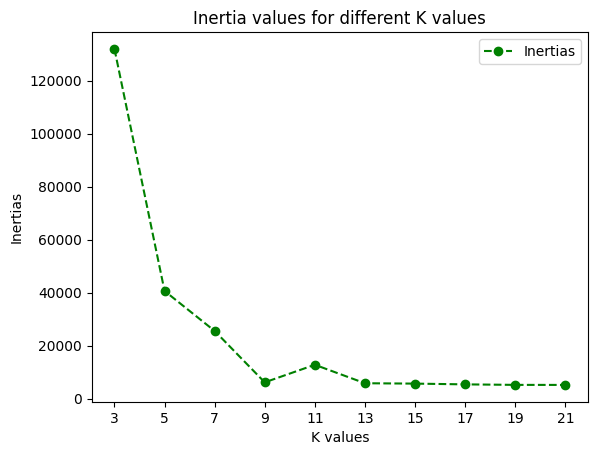

In [ ]:
model2 = KMeans()
k_vals2 = [3,5,7,9,11,13,15,17,19,21]
model2.get_elbow(X, k_vals2)

From the graph, it is clear that k = 9 is the best k value. Then I plot the clusters with their centoids for few of the combinations of features, for visualization purpose

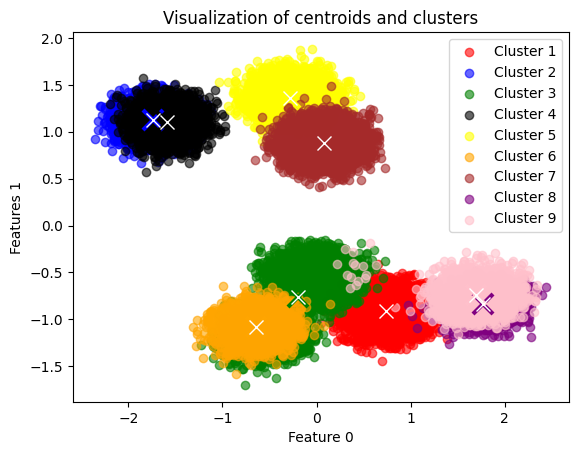

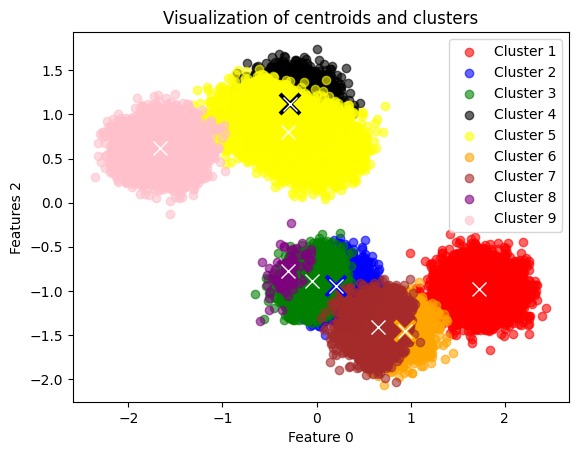

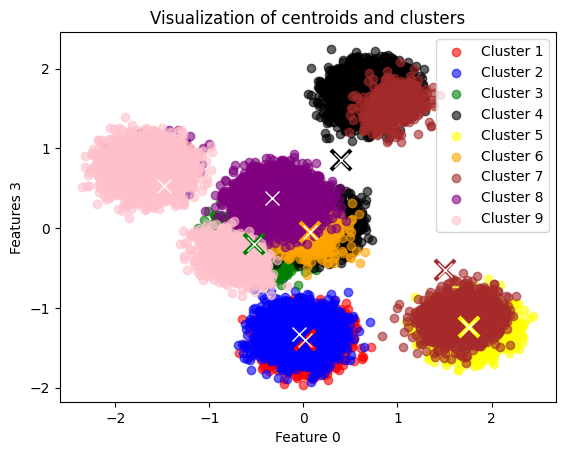

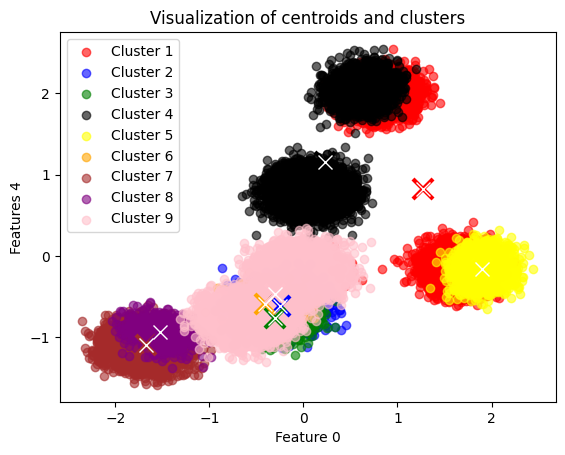

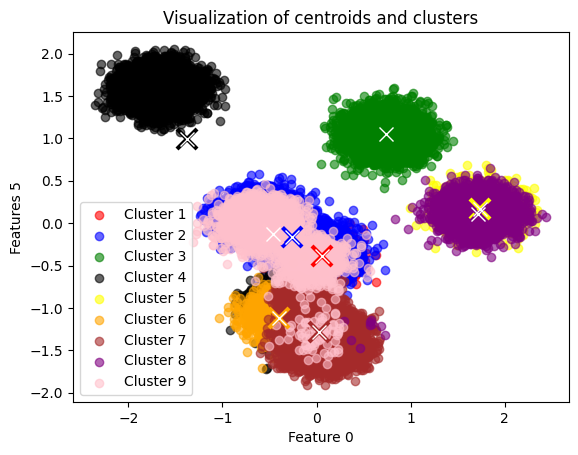

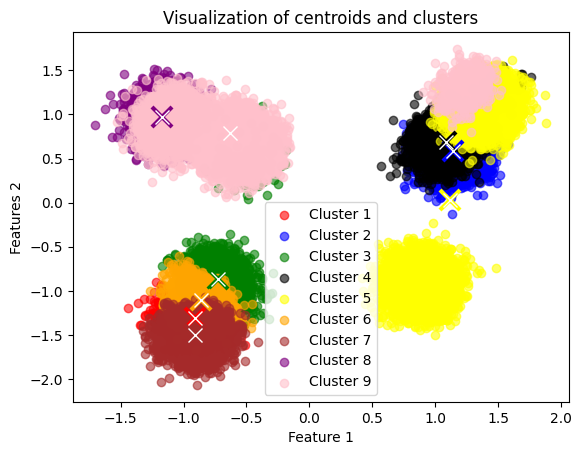

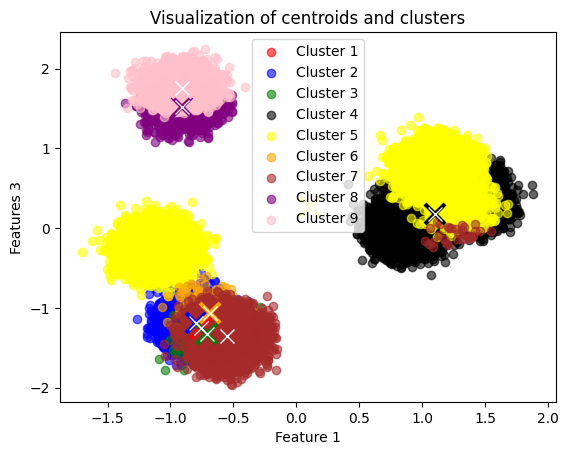

In [ ]:
indx_pair = [
    (0,1),
    (0,2),
    (0,3),
    (0,4),
    (0,5),
    (1,2),
    (1,3)
]
for indx, (i,j) in enumerate(indx_pair):
    model3 = KMeans()
    model3.visualize(X,9,1,i,j)
# model3 = KMeans()
# model3.visualize(X,3,1,2)

In [ ]:
centroids, clusters = model2.classify(X, 9)

I then plot all possible combinations of features on a graph with clusters and centroids seperated by different colors. I've used the plot_all function that I've written in the KMeans class.

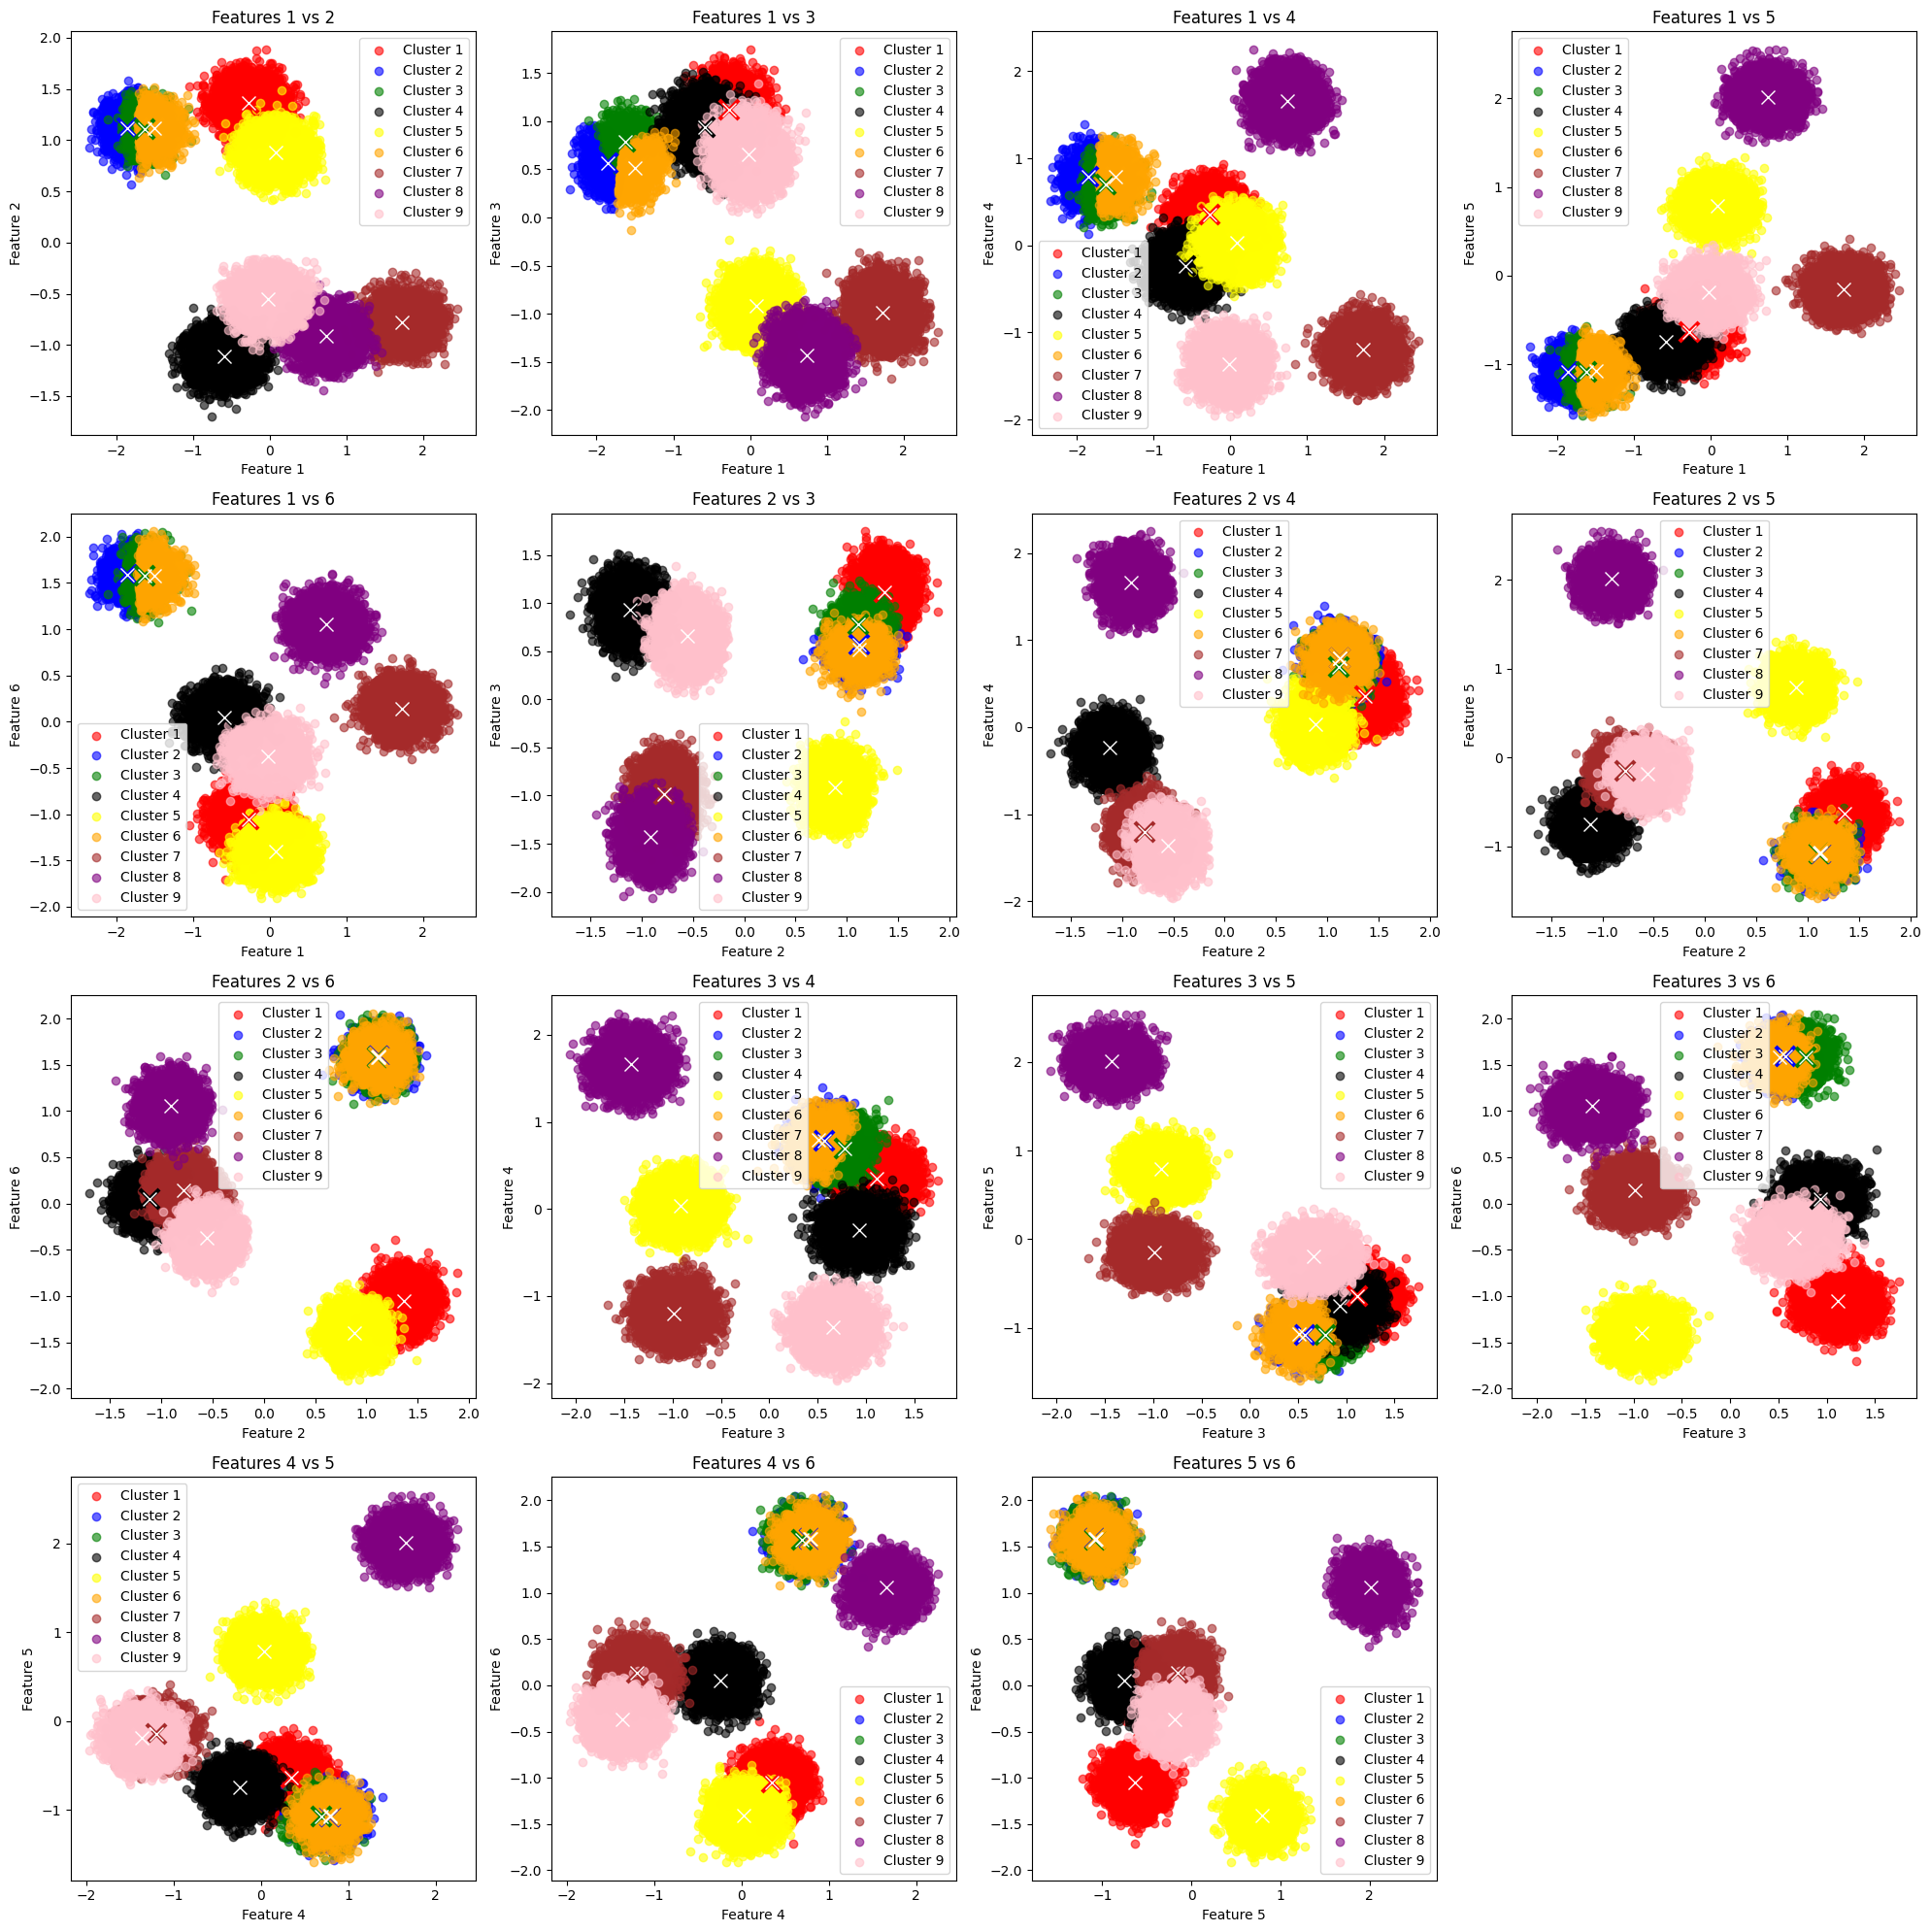

In [ ]:
model3 = KMeans()
centroids, clusters = model3.classify(X, 9)
model3.plot_all(X, centroids, clusters)

After this, I save all the target value of this unsupervised data into a CSV file with cluster/class label and IDs of the datapoints.

In [ ]:
#Adding to CSV file:
IDs = data['ID'].to_numpy()
cluster_map = []
for cls_lbl, cluster in enumerate(clusters):
  for point in cluster:
    point_indx = np.where((X == point).all(axis=1))[0][0]
    #in this, the np.where((X ==  point)) gives a matrix of shape of the larger of the 2, X here (broadcasting the 'point' to X). The matrix contains true and falses, based on where the equality holds. Then, .all(axis=1) matches all true false conditions along row (that is for each eg.). This returns a list of tuple of indxs where the condition matches. in the list, the first element is the first match and the 0th index gives the row.
    cluster_map.append((point_indx+1, cls_lbl)) #a point index of 0 means id of 1
df = pd.DataFrame(cluster_map, columns=['ID', 'Cluster'])
df.sort_values(by='ID', inplace=True)
print(df.head())
df.to_csv('cluster_map.csv', index=False)

       ID  Cluster
34286   1        8
0       2        0
20957   3        5
28572   4        7
28573   5        7
